# Lead Scoring Salse Funnel
Using past sales data and different meterics and categorical data, this notebook aims at creating a logistic regression model.

## Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
plt.style.use("ggplot") 

In [3]:
# Importing all datasets
data = pd.read_csv("Leads.csv")

## Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [8]:
# List of variables to map

varlist =  ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function
data[varlist] = data[varlist].apply(binary_map)
# No such binary columns present

### Droping all columns with single value

In [9]:
for col_name in varlist:
    if len(data[col_name].unique()) <=1:
        print("Droping single valued column: "+ col_name)
        data = data.drop([col_name], 1)

Droping single valued column: Magazine
Droping single valued column: Receive More Updates About Our Courses
Droping single valued column: Update me on Supply Chain Content
Droping single valued column: Get updates on DM Content
Droping single valued column: I agree to pay the amount through cheque


In [10]:
for col_name in data.columns:
    print("Unique value count for column: "+str(len(data[col_name].unique()))+" for "+ col_name)

Unique value count for column: 9240 for Prospect ID
Unique value count for column: 9240 for Lead Number
Unique value count for column: 5 for Lead Origin
Unique value count for column: 22 for Lead Source
Unique value count for column: 2 for Do Not Email
Unique value count for column: 2 for Do Not Call
Unique value count for column: 2 for Converted
Unique value count for column: 42 for TotalVisits
Unique value count for column: 1731 for Total Time Spent on Website
Unique value count for column: 115 for Page Views Per Visit
Unique value count for column: 18 for Last Activity
Unique value count for column: 39 for Country
Unique value count for column: 20 for Specialization
Unique value count for column: 11 for How did you hear about X Education
Unique value count for column: 7 for What is your current occupation
Unique value count for column: 4 for What matters most to you in choosing a course
Unique value count for column: 2 for Search
Unique value count for column: 2 for Newspaper Articl

In [11]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


#### Dropping target derived and other irrelevant columns

In [12]:
data = data.drop(["Prospect ID"], 1)

In [13]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Do Not Call                                    9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [16]:
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [17]:
# Get the data types of each column
column_data_types = data.dtypes

# Filter out columns with object data type
object_columns = column_data_types[column_data_types == 'object'].index.tolist()

print("Object data type columns:")
for col in object_columns:
    print(col)

Object data type columns:
Lead Origin
Lead Source
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Tags
Lead Quality
Lead Profile
City
Asymmetrique Activity Index
Asymmetrique Profile Index
Last Notable Activity


#### Checking for Missing Values and Inputing Them

In [18]:
# Adding up the missing values (column-wise)
data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [19]:
# Checking the percentage of missing values
nan_percent = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending = False)
nan_percent

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [20]:
num_col = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == 'float64')].keys()

In [21]:
cat_col = data.dtypes[~(data.dtypes == 'int64') & ~(data.dtypes == 'float64')].keys()

In [22]:
num_df = data.select_dtypes(include=['int', 'float'])

In [23]:
cat_df = data[cat_col]

In [24]:
(num_df.isnull().sum()/num_df.shape[0]*100).sort_values(ascending = False)

Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Lead Number                                0.000000
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
Search                                     0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
A free copy of Mastering The Interview     0.000000
dtype: float64

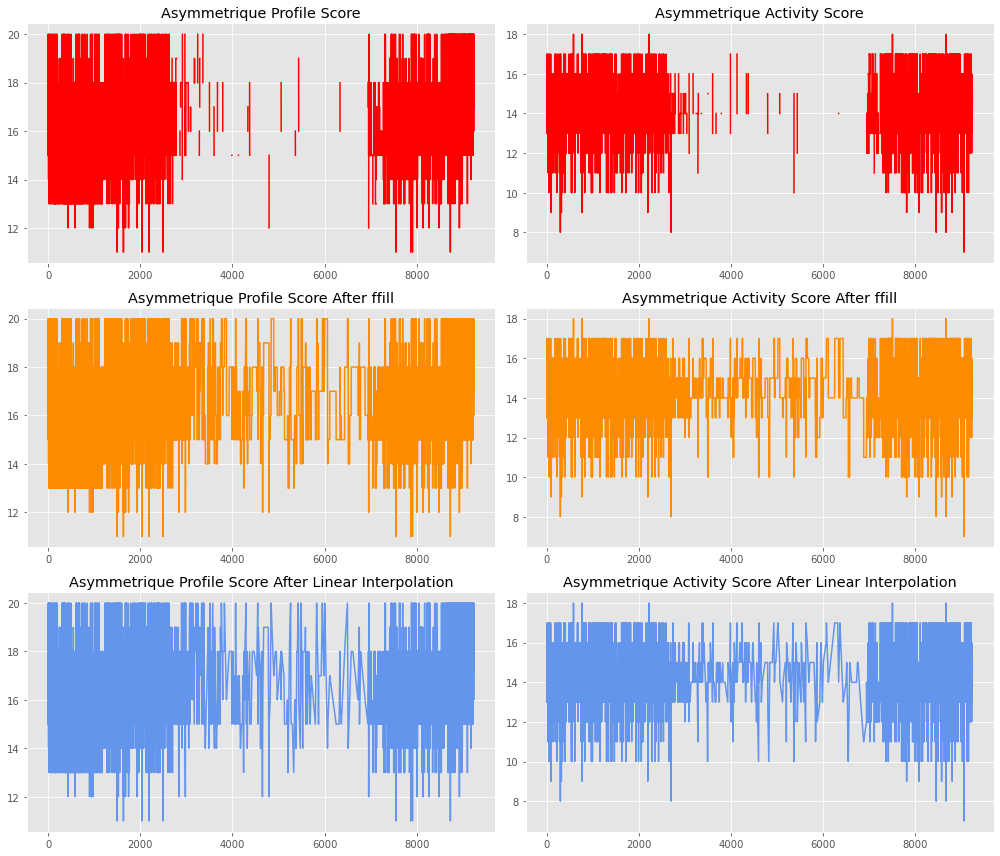

In [25]:
# Defining the columns to work with as these columns have the highest percentages of nulls in context of numeric columns
profile_score_col = "Asymmetrique Profile Score"
activity_score_col = "Asymmetrique Activity Score"

# Create a figure with subplots
plt.figure(figsize=(14, 12))

# Function to plot and title a subplot
def plot_subplot(subplot_number, title, data, color):
    plt.subplot(subplot_number)
    plt.title(title)
    plt.plot(data, color=color)

# Original data plots
plot_subplot(321, profile_score_col, num_df[profile_score_col], 'r')
plot_subplot(322, activity_score_col, num_df[activity_score_col], 'r')

# Plot with ffill method
plot_subplot(323, profile_score_col + " After ffill", num_df[profile_score_col].fillna(method='ffill'), 'darkorange')
plot_subplot(324, activity_score_col + " After ffill", num_df[activity_score_col].fillna(method='ffill'), 'darkorange')

# Plot with linear interpolation
plot_subplot(325, profile_score_col + " After Linear Interpolation", num_df[profile_score_col].interpolate(), 'cornflowerblue')
plot_subplot(326, activity_score_col + " After Linear Interpolation", num_df[activity_score_col].interpolate(), 'cornflowerblue')

# Ensure proper layout of subplots
plt.tight_layout()

# Show the figure
plt.show()



As observed in this data, there is a significant number of missing values. Attempting to fill in or estimate these missing values may not be the most suitable approach, especially when a substantial portion of the data is missing. It would be more prudent to omit the column to prevent introducing unpredictability and bias into our model.

In [26]:
num_df = num_df.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

In [27]:
se_median = SimpleImputer(missing_values = np.nan, strategy='median')

In [28]:
num_df[['TotalVisits', 'Page Views Per Visit']] = se_median.fit_transform(num_df[['TotalVisits', 'Page Views Per Visit']])

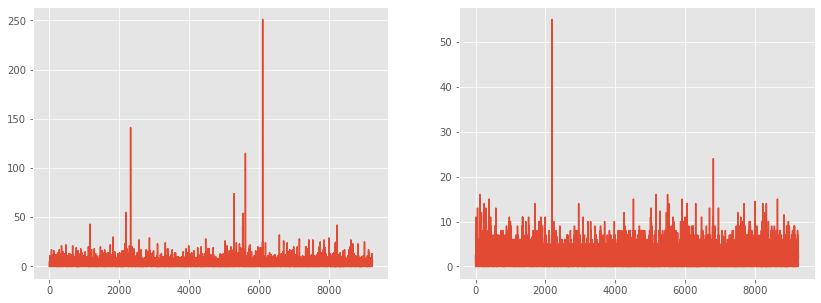

In [29]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(num_df['TotalVisits'])
plt.subplot(122)
plt.plot(num_df['Page Views Per Visit'])

In [30]:
num_df.isnull().sum()

Lead Number                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

In [31]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

In [32]:
# Removing columns whch column containd more than 40% of Missing Values
cols=cat_df.columns[round((cat_df.isnull().sum()/len(cat_df))*100)>=40]
cat_df=cat_df.drop(cols,1)

In [33]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

In [34]:
# dropping 'Tags' as these features is derived by sales team
cat_df.drop('Tags',1,inplace=True)

In [35]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable
cat_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
cat_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [37]:
# Finding the Labels contains in the "Lead Profile" Variable
cat_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
cat_df.head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,NaN,Select,Select,Unemployed,Select,Select,Modified
1,API,Organic Search,Email Opened,India,Select,Select,Unemployed,Select,Select,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Select,Student,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Select,Other,Unemployed,Select,Mumbai,Modified


As we've observed in the dataframe, the presence of "Select" values indicates that these are actually missing values.

In [39]:
# Replacing Select values with nan values
cat_df = cat_df.replace('Select', np.nan)

In [40]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

How did you hear about X Education    78.463203
Lead Profile                          74.188312
City                                  39.707792
Specialization                        36.580087
What is your current occupation       29.112554
Country                               26.634199
Last Activity                          1.114719
Lead Source                            0.389610
Lead Origin                            0.000000
Last Notable Activity                  0.000000
dtype: float64

In [41]:
# Removing columns whch column containd more than 40% of Missing Values
cols=cat_df.columns[round((cat_df.isnull().sum()/len(cat_df))*100)>=40]
cat_df=cat_df.drop(cols,1)

In [42]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

Specialization                     36.580087
What is your current occupation    29.112554
Country                            26.634199
Last Activity                       1.114719
Lead Source                         0.389610
Lead Origin                         0.000000
Last Notable Activity               0.000000
dtype: float64

In [43]:
# Finding the Labels contains in the Specialization Variable
cat_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [44]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
cat_df['Specialization']=cat_df['Specialization'].replace(np.nan,'Finance Management')

In [45]:
# Finding the Labels contains in the "What is your current occupation" Variable
cat_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [46]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
cat_df['What is your current occupation']=cat_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [47]:
# Finding the Labels contains in the Country Variable
cat_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [48]:
# imputing  "India" as its common occurance in Country Column
cat_df['Country']=cat_df['Country'].replace(np.nan,'India')

In [49]:
# Finding the Labels contains in the "Last Activity Variable
cat_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
cat_df['Last Activity']=cat_df['Last Activity'].fillna('Email Opened')

In [51]:
# Finding the Labels contains in the "Last Activity Variable
cat_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [52]:
# imputing  "Google" as its common occurance in Lead Source Column
cat_df['Lead Source']=cat_df['Lead Source'].replace(np.nan,'Google')

In [53]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
cat_df['Lead Source']=cat_df['Lead Source'].replace('google','Google')

In [54]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

Lead Origin                        0.0
Lead Source                        0.0
Last Activity                      0.0
Country                            0.0
Specialization                     0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

In [55]:
(num_df.isnull().sum()/num_df.shape[0]*100).sort_values(ascending = False)

Lead Number                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [56]:
lead_df = pd.concat([num_df, cat_df], axis = 1)

Now we don't have any missing values

### Data Quality checks

In [57]:
# making lead number as index
lead_df=lead_df.set_index('Lead Number')

#### Outlier Detection

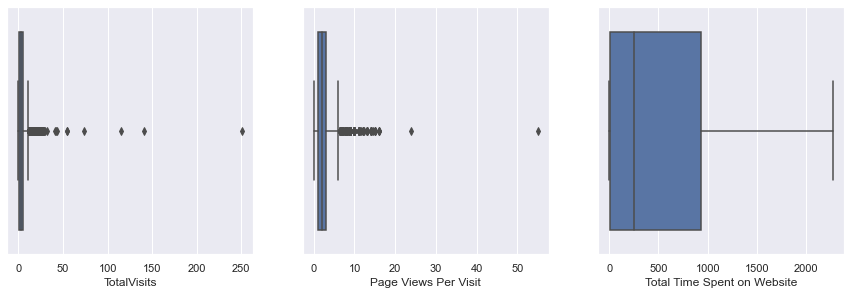

In [166]:
# Identifying Outliers
plt.figure(figsize=(15, 10))

# Outliers in TotalVisits
plt.subplot(2, 3, 1)
sns.boxplot(lead_df['TotalVisits'])

# Outliers in Page Views Per Visit
plt.subplot(2, 3, 2)
sns.boxplot(lead_df['Page Views Per Visit'])

# Outliers in Total Time Spent on Website
plt.subplot(2, 3, 3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')

plt.show()

Outliers are evident in both the variables ```TotalVisits``` and ```Page Views Per Visit``` indicating the need for outlier treatment. Additionally, it's noteworthy that the values are significantly skewed above the median in the ```Total Time Spent on Website```

In [58]:
# Storing columns with dtype object and numeric data types in two different lists
col_obj = list(lead_df.select_dtypes(include=['object']).columns)
col_num = list(lead_df.select_dtypes(include=['int64', 'float64']).columns)

print('Columns with object data type:\n', col_obj)
print('\nColumns with numeric data types:\n', col_num)


Columns with object data type:
 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Last Notable Activity']

Columns with numeric data types:
 ['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


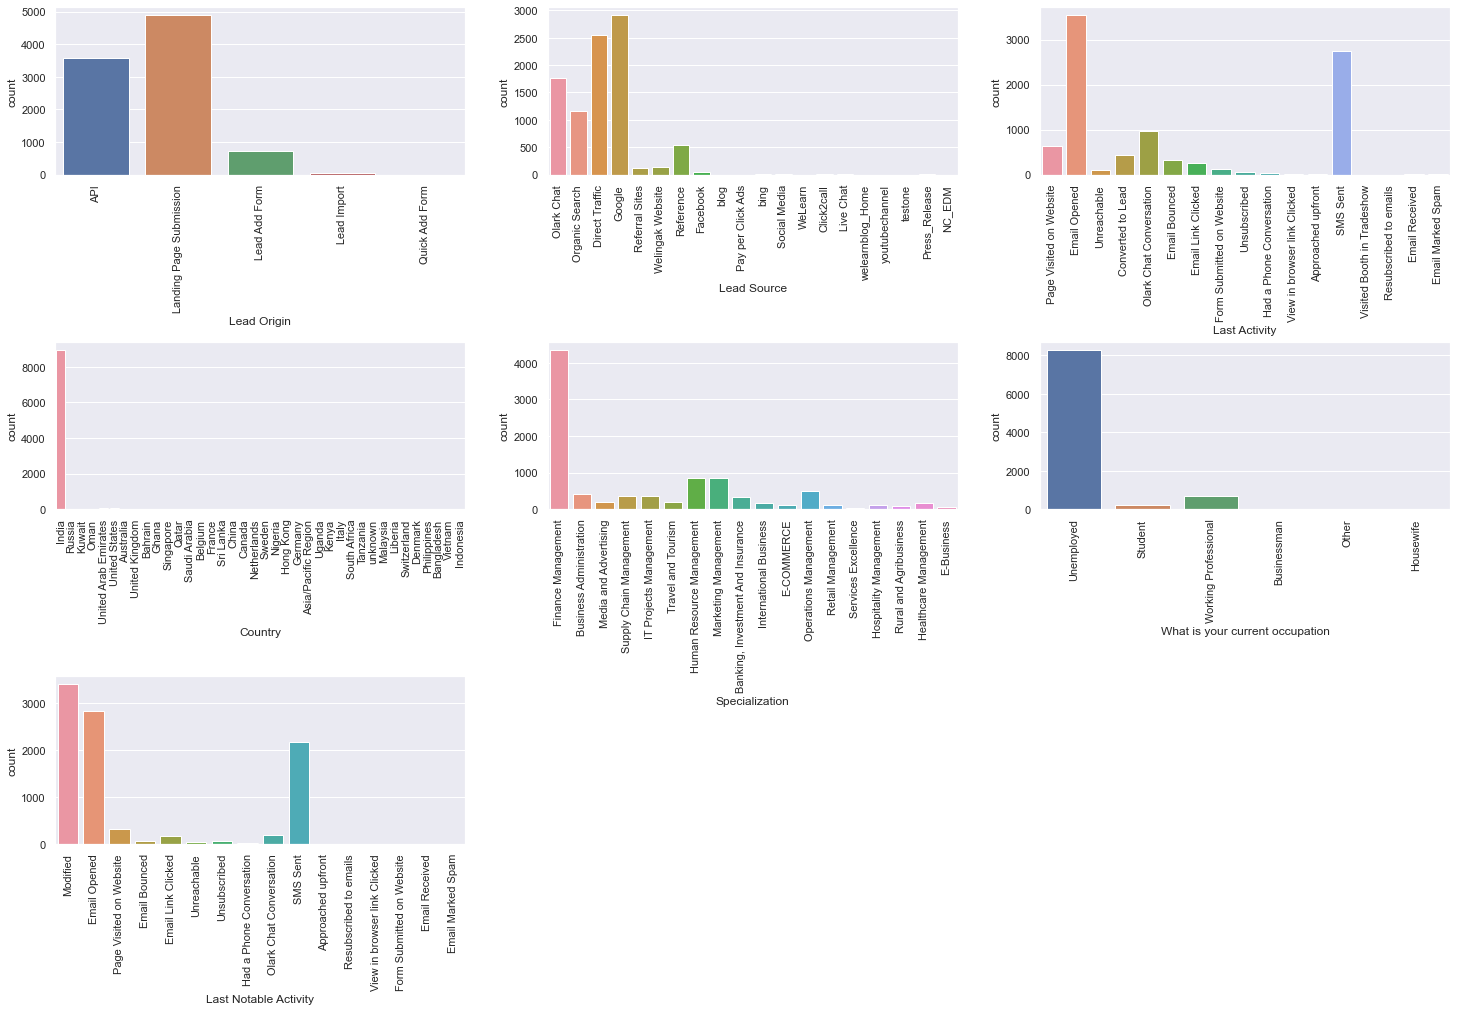

In [59]:
# Visualizing data distribution by plotting count plots for categorical columns
# and histograms for numerical columns

# Adjusting figure size and spacing
plt.figure(figsize=(25, 40))
sns.set()
plt.subplots_adjust(wspace=0.2, hspace=1)

# Iterate through each column in 'col_obj'
for index, column in enumerate(col_obj):
    # Create subplots in a 7x3 grid
    plt.subplot(7, 3, index + 1)
    
    # Create count plots for categorical columns
    if lead_df[column].dtype == 'object':
        sns.countplot(x=column, data=lead_df)
        plt.xticks(rotation=90)
    
    # Create histograms for numerical columns
    else:
        sns.histplot(lead_df[column], kde=True)
    
# Display the plots
plt.show()


#### Observations

- It's evident that several columns exhibit significant skewness. Removing these columns from the dataset is advisable as they won't contribute meaningfully to model development.

- Some columns have numerous categories (more than 5). In these cases, it's a viable option to replace infrequent categories with a new value, such as 'Other.'

Removing Highly Skewed variables and if Column contains Single Labels

In [60]:
# Taking care of highly skewed columns  and one value only
lead_df=lead_df.drop(['What is your current occupation','Country'],1)

#### Analysing the catagorical column which have 0 and 1 values 
<br> Do Not Email
<br> Do Not Call
<br> Search
<br> Newspaper Article
<br> X Education Forums
<br> Newspaper
<br> Digital Advertisement
<br> Through Recommendations
<br> A free copy of Mastering The Interview

In [61]:
col_num_cat = ["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]

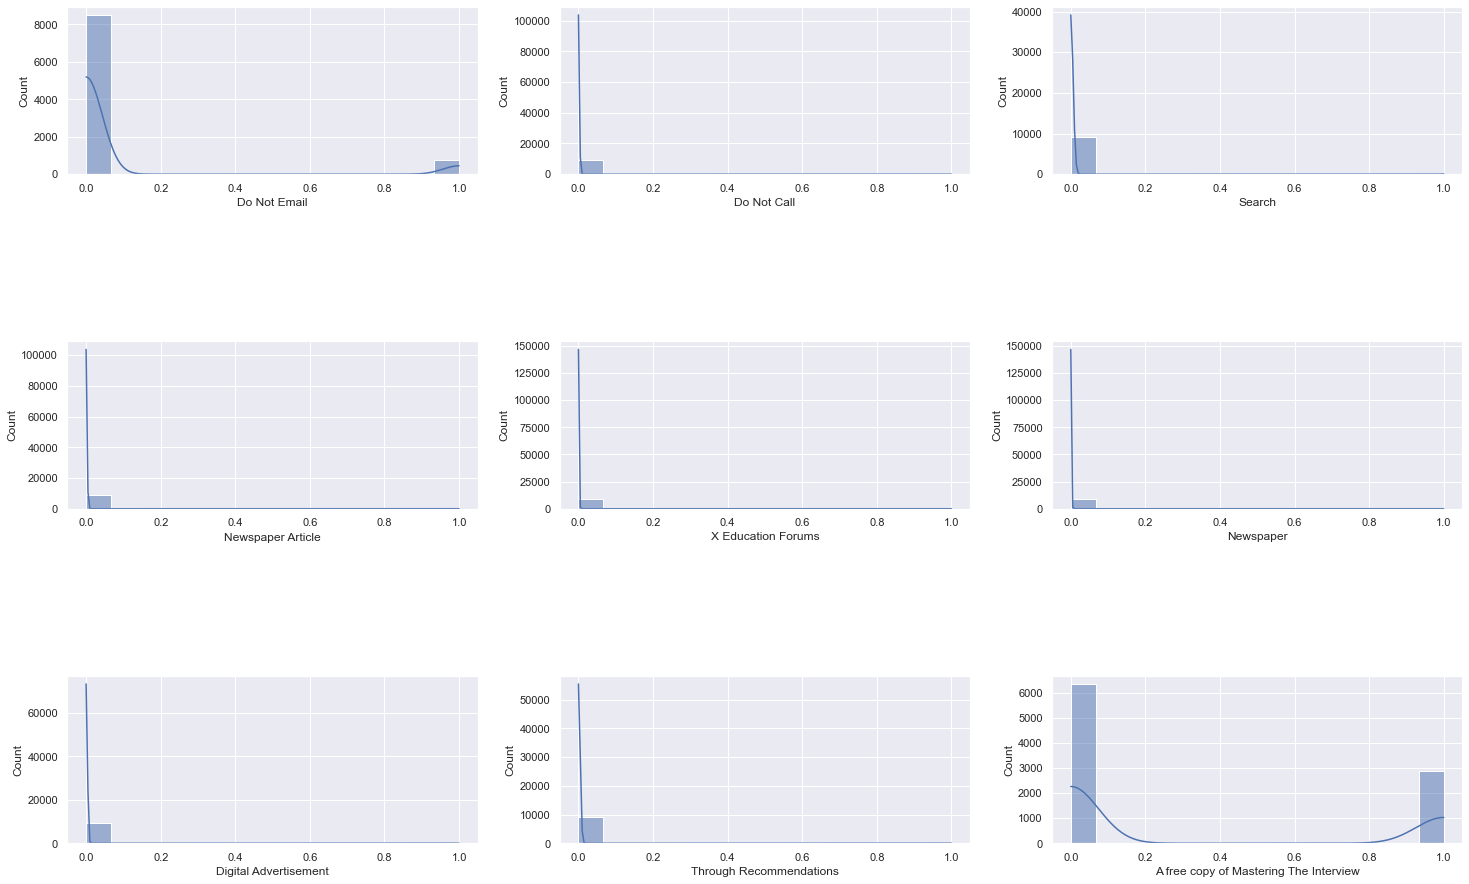

In [62]:
# Visualizing data distribution by plotting count plots for categorical columns
# and histograms for numerical columns

# Adjusting figure size and spacing
plt.figure(figsize=(25, 40))
sns.set()
plt.subplots_adjust(wspace=0.2, hspace=1)

# Iterate through each column in 'col_obj'
for index, column in enumerate(col_num_cat):
    # Create subplots in a 7x3 grid
    plt.subplot(7, 3, index + 1)
    
    # Create count plots for categorical columns
    if lead_df[column].dtype == 'object':
        sns.countplot(x=column, data=lead_df)
        plt.xticks(rotation=90)
    
    # Create histograms for numerical columns
    else:
        sns.histplot(lead_df[column], kde=True)
    
# Display the plots
plt.show()

In [63]:
# Taking care of highly skewed columns  and one value only
lead_df=lead_df.drop(['Do Not Call','Do Not Email','Search','X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

## Step 4: In-Depth Data Investigation

### Single-Variable Examination (Categorical)

In [64]:
# crating cols which contains only Categorical variable
categorical_columns = lead_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Last Notable Activity'],
      dtype='object')

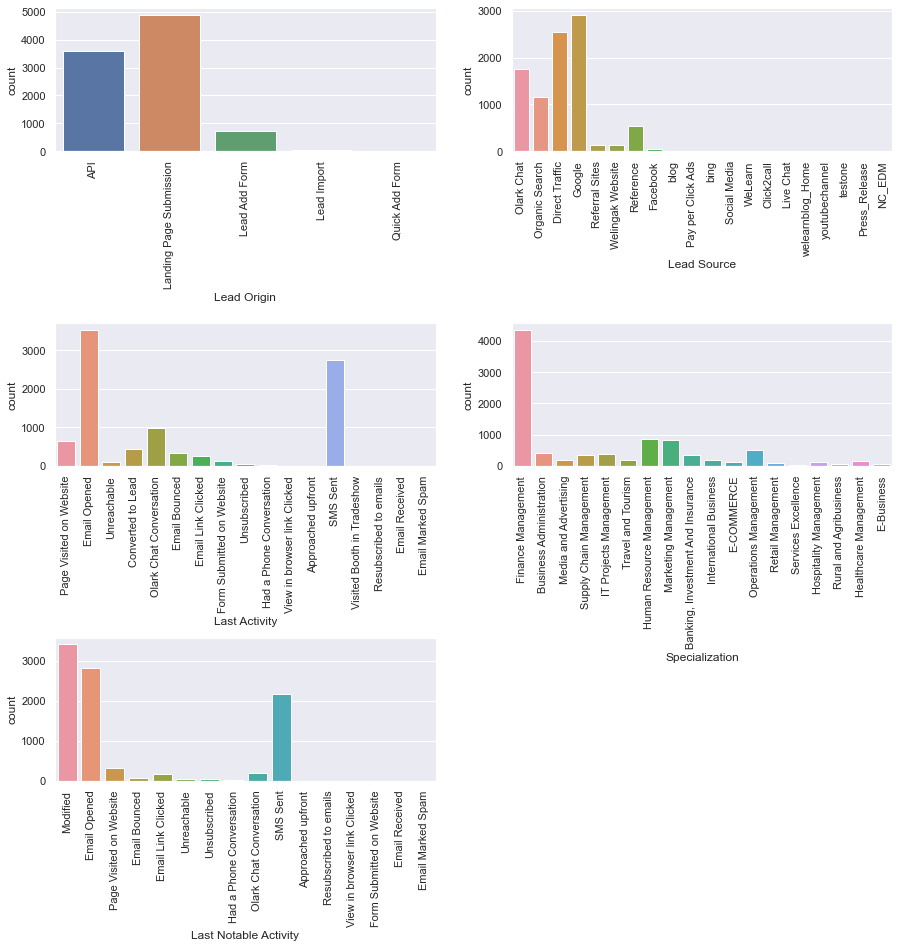

In [65]:
# Adjust plot dimensions and spacing for clarity
plt.figure(figsize=(15, 20))
sns.set()
plt.subplots_adjust(wspace=0.2, hspace=1.2)

# Iterate through categorical columns and create count plots
for index, column_name in enumerate(categorical_columns):
    plt.subplot(4, 2, index + 1)
    sns.countplot(x=column_name, data=lead_df)
    plt.xticks(rotation=90)

# Display the plot
plt.show()


**Key Findings:**
- Lead Source: Direct Traffic and Google are the predominant sources for generating leads.
- High Engagement: Email Opened and SMS Sent in the Last Activity exhibit a substantial number of interactions.
- Popular Specialization: Finance Management stands out as the preferred specialization among individuals.
- Limited Interest: IT Project Management seems to have relatively low popularity, with fewer individuals showing interest in this specialization.

#### Single-Variable Examination (Continuous)

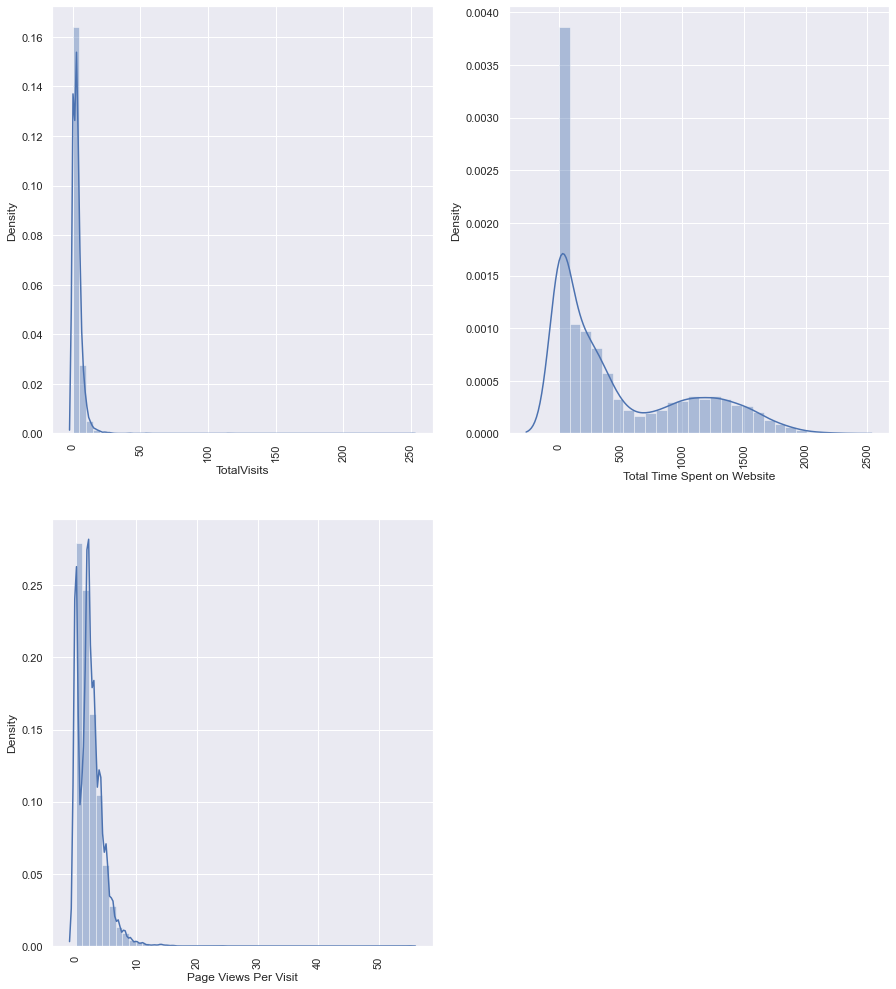

In [66]:
# Create a list of columns with numeric (int or float) data types
numeric_columns = [col for col in lead_df.columns if lead_df[col].dtype in ['int64', 'float64']]

# Filter columns with more than three distinct values
filtered_numeric_columns = [col for col in numeric_columns if lead_df[col].nunique() > 3]

# Set up the plot for continuous univariate analysis
plt.figure(figsize=(15, 15))
plt.subplots_adjust(bottom=0.01)

# Iterate through filtered numeric columns and create distribution plots
for index, column_name in enumerate(filtered_numeric_columns):
    plt.subplot(2, 2, index + 1)
    sns.distplot(lead_df[column_name])
    plt.xticks(rotation=90)

# Display the plot
plt.show()


**Key Observations:**
- Continuous variables do not exhibit a normal distribution.
- Outliers are evident in the Total Visits and Page Views Per Visit columns.
- Most values in the Total Visits column fall within the 0-50 range, while Page Views Per Visit mostly ranges from 0 to 20.

### Bivariate Analysis

Bivariate Analysis Relating to the Target Column ```Converted```

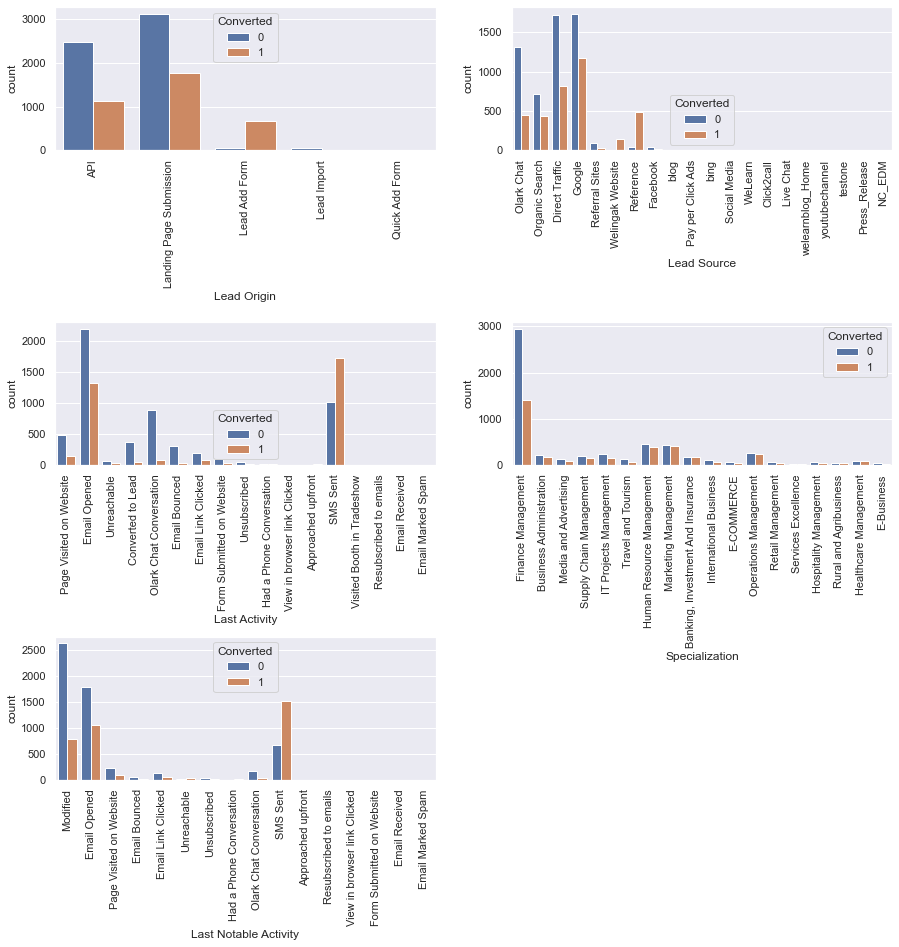

In [67]:
# Creating a visually appealing and well-organized plot
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.2, hspace=1.2)

# Iterate through categorical columns for bivariate analysis with respect to 'Converted'
for index, column_name in enumerate(categorical_columns):
    plt.subplot(4, 2, index + 1)
    sns.countplot(x=column_name, hue='Converted', data=lead_df)
    plt.xticks(rotation=90)

# Display the plot
plt.show()


**Key Findings:**
- Within the "Lead Source" category, the count of "Hot" leads is more pronounced in "Direct Traffic" and "Google" sources, while it's relatively lower in the "Other" category.
- For "Last Activity," "Hot" leads are more prevalent with "SMS," whereas "Email" has more "Cold" leads compared to "Hot" leads.
- "Last Notable Activity" closely resembles "Last Activity" in terms of lead categorization.
- In the "Specialization" category, the majority of leads originate from "Finance Management," but the number of "Hot" leads is lower compared to "Cold" leads.

## Step 5: Data Preprocessing and Feature Selection

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [68]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_df[categorical_columns], drop_first=True)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy1], axis=1)

# We have created dummies for the below variables, so we can drop them
lead_df = lead_df.drop(categorical_columns, 1)

In [69]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           9240 non-null   int64  
 1   TotalVisits                                         9240 non-null   float64
 2   Total Time Spent on Website                         9240 non-null   int64  
 3   Page Views Per Visit                                9240 non-null   float64
 4   A free copy of Mastering The Interview              9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                 9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                           9240 non-null   uint8  
 7   Lead Origin_Lead Import                             9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                          9240 non-null   uin

In [70]:
# Set a threshold for the percentage of unique values
threshold = 0.9  # Adjust this threshold as needed

# Create a list of column names to drop
columns_to_drop = []
for col in lead_df.columns:
    unique_counts = lead_df[col].value_counts()
    dominant_count = unique_counts.iloc[0]
    total_count = unique_counts.sum()
    if dominant_count / total_count > threshold:
        columns_to_drop.append(col)
columns_to_drop

['Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Facebook',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Page Visited on Website',
 'Last Activity_Resubscribed to emails',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'Last Activity_View in browser link Clicked',
 'Last Activity_Visited Booth in Tradeshow',
 'S

In [71]:
# Drop the identified columns
lead_df = lead_df.drop(columns=columns_to_drop)

Now you can see that you have all variables as numeric.

## Step 6: Test-Train Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Setting target variable
target_column = 'Converted'
data = lead_df

In [74]:
# Putting feature variable to X
X = data.drop([target_column], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Finance Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,1,0
660728,5.0,674,2.5,0,0,0,0,0,1,1,0,0,1,1,0,0
660727,2.0,1532,2.0,1,1,1,0,0,0,1,0,0,0,1,0,0
660719,1.0,305,1.0,0,1,1,0,0,0,0,0,0,0,0,1,0
660681,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,1,0,1,0


In [75]:
# Putting response variable to y
y = data[target_column]

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 641410 to 606685
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TotalVisits                             6468 non-null   float64
 1   Total Time Spent on Website             6468 non-null   int64  
 2   Page Views Per Visit                    6468 non-null   float64
 3   A free copy of Mastering The Interview  6468 non-null   int64  
 4   Lead Origin_Landing Page Submission     6468 non-null   uint8  
 5   Lead Source_Direct Traffic              6468 non-null   uint8  
 6   Lead Source_Google                      6468 non-null   uint8  
 7   Lead Source_Olark Chat                  6468 non-null   uint8  
 8   Lead Source_Organic Search              6468 non-null   uint8  
 9   Last Activity_Email Opened              6468 non-null   uint8  
 10  Last Activity_Olark Chat Conversation   6468 non-null

In [79]:
# Scalling all columns using standard scaler
scaler = StandardScaler()
columns_to_scale = X_train.columns
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Finance Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,
641410,-0.656434,-0.885371,-1.085519,-0.673169,-1.057954,-0.610463,-0.687272,2.063622,-0.371121,1.273920,-0.337384,-0.655280,-0.947275,1.508289,-0.762761,-0.558064
597687,0.100767,0.005716,-0.470569,1.485511,0.945221,1.638100,-0.687272,-0.484585,-0.371121,1.273920,-0.337384,-0.655280,1.055659,1.508289,-0.762761,-0.558064
626825,0.290067,-0.691418,0.070401,-0.673169,-1.057954,-0.610463,-0.687272,2.063622,-0.371121,1.273920,-0.337384,-0.655280,1.055659,1.508289,-0.762761,-0.558064
587928,0.290067,1.365219,1.226321,-0.673169,0.945221,-0.610463,1.455029,-0.484585,-0.371121,-0.784979,-0.337384,1.526065,-0.947275,-0.663003,-0.762761,1.791909
622366,-0.656434,-0.885371,-1.085519,-0.673169,-1.057954,-0.610463,-0.687272,2.063622,-0.371121,1.273920,-0.337384,-0.655280,1.055659,-0.663003,1.311026,-0.558064


In [80]:
### Checking the target_column Rate
target_column_rate = (sum(data[target_column])/len(data[target_column].index))*100
target_column_rate

38.53896103896104

We have almost 38% Conversion rate

## Step 8: Looking at Correlations

In [81]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Correlation Matrix')

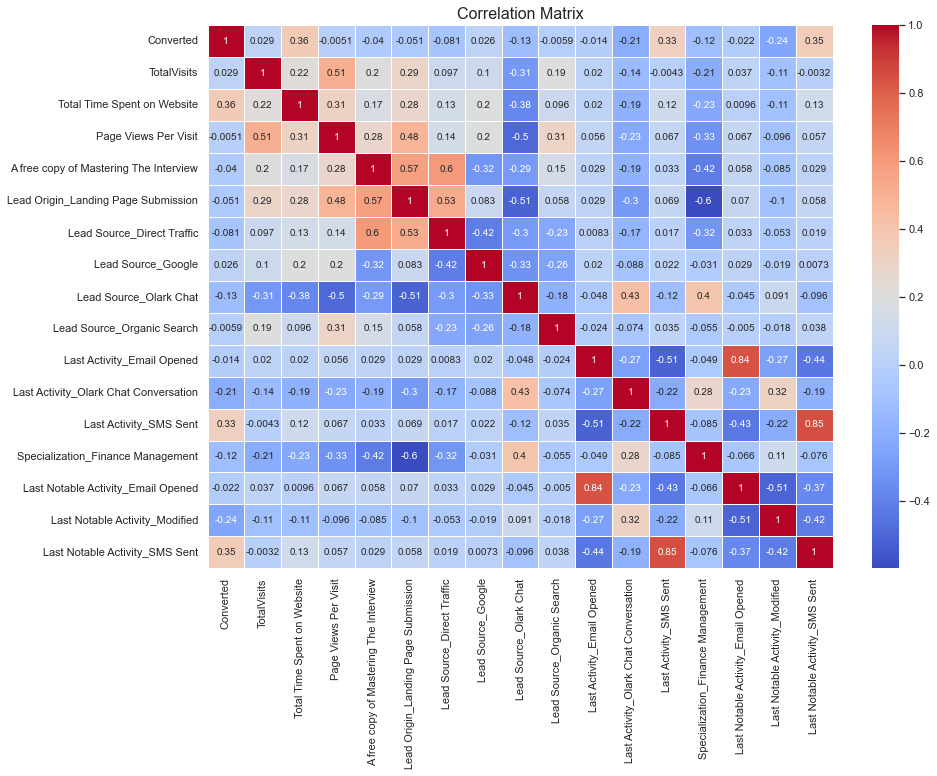

In [82]:
# Let's see the correlation matrix 
plt.figure(figsize=(14, 10))

# Generate a correlation matrix and display it as a heatmap with annotations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

#### Dropping highly correlated variables

In [83]:
# Generate a correlation matrix
correlation_matrix = data.corr()

# Set a threshold for correlation magnitude
threshold = 0.75

# Get the column names with correlation magnitude > threshold
highly_correlated_columns = []

# Iterate through the upper triangular part of the correlation matrix to avoid duplicates
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_columns.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the column names with high correlation magnitude
for col1, col2, value in highly_correlated_columns:
    print(f"Columns '{col1}' and '{col2}' have a correlation value '{value}' i.e. magnitude > {threshold}")


Columns 'Last Activity_Email Opened' and 'Last Notable Activity_Email Opened' have a correlation value '0.842496452977487' i.e. magnitude > 0.75
Columns 'Last Activity_SMS Sent' and 'Last Notable Activity_SMS Sent' have a correlation value '0.8527074224633012' i.e. magnitude > 0.75


In [84]:
highly_correlated_columns

[('Last Activity_Email Opened',
  'Last Notable Activity_Email Opened',
  0.842496452977487),
 ('Last Activity_SMS Sent',
  'Last Notable Activity_SMS Sent',
  0.8527074224633012)]

In [85]:
correlated_drop_columns = [tuple[0] for tuple in highly_correlated_columns]
X_train = X_train.drop(correlated_drop_columns, 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

Text(0.5, 1.0, 'Correlation Matrix')

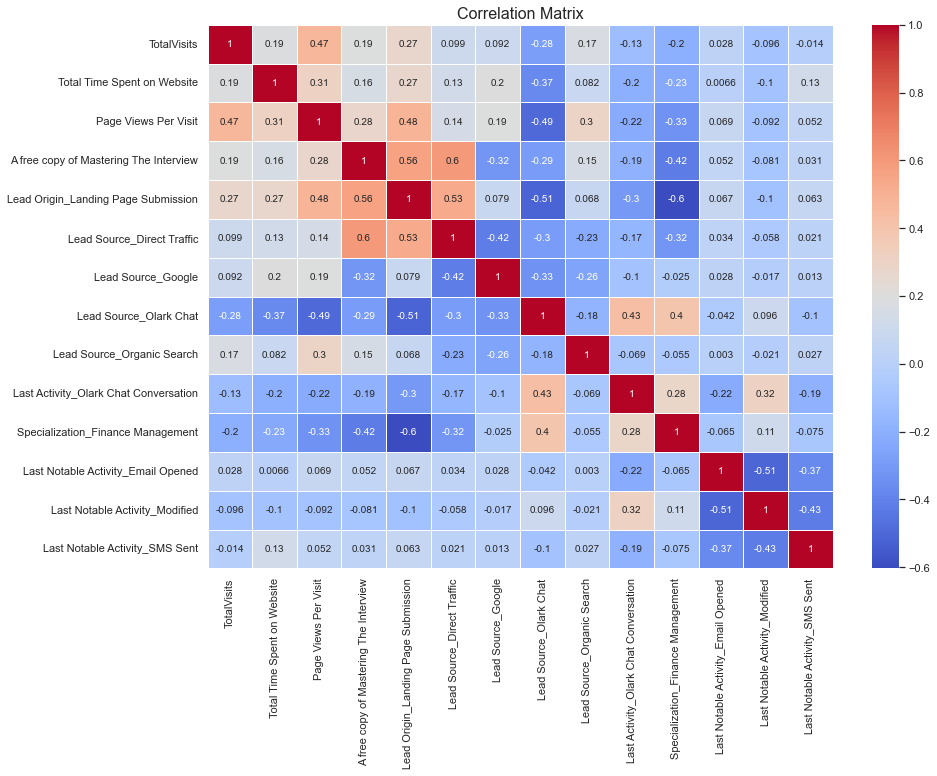

In [86]:
# Let's see the correlation matrix 
plt.figure(figsize=(14, 10))

# Generate a correlation matrix and display it as a heatmap with annotations
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Matrix", fontsize=16)


### Step 9: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [87]:
import statsmodels.api as sm

In [88]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.5
Date:                Tue, 17 Oct 2023   Deviance:                       6043.1
Time:                        17:20:15   Pearson chi2:                 6.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6589      0.034    -19.636      0.000      -0.725      -0.593
TotalVisits                                0.1008      0.041      2.434      0.015       0.020       0.182
Total Time Spent on Website                1.0523      0.037     28.145      0.000       0.979       1.126
Page Views Per Visit                      -0.2412      0.048     -4.996      0.000      -0.336      -0.147
A free copy of Mastering The Interview    -0.0407      0.046     -0.887      0.375      -0.131       0.049
Lead Origin_Landing Page Submission       -0.2924      0.054     -5.393      0.000      -0.399      -0.186
Lead Source_Direct Traffic                -1.1615      0.070    -16.588      0.000      -1.299      -1.024
Lead Source_Google                        -1.0304      0.063    -16.342      0.000      -1.154      -0.907
Lead Source_Olark Chat                    -0.6689      0.053    -12.719      0.000      -0.772      -0.566
Lead Source_Organic Search                -0.7780      0.052    -14.862      0.000      -0.881      -0.675
Last Activity_Olark Chat Conversation     -0.3385      0.050     -6.733      0.000      -0.437      -0.240
Specialization_Finance Management         -0.3440      0.042     -8.245      0.000      -0.426      -0.262
Last Notable Activity_Email Opened         0.1463      0.058      2.516      0.012       0.032       0.260
Last Notable Activity_Modified            -0.1575      0.061     -2.567      0.010      -0.278      -0.037
Last Notable Activity_SMS Sent             0.7260      0.056     13.028      0.000       0.617       0.835
==========================================================================================================
"""

## Step 10: Feature Selection Using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [93]:
col = X_train.columns[rfe.support_]

In [94]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview'], dtype='object')

##### Assessing the model with StatsModels

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.9
Date:                Tue, 17 Oct 2023   Deviance:                       6043.9
Time:                        17:20:15   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6590      0.034    -19.637      0.000      -0.725      -0.593
TotalVisits                               0.0992      0.041      2.418      0.016       0.019       0.180
Total Time Spent on Website               1.0516      0.037     28.143      0.000       0.978       1.125
Page Views Per Visit                     -0.2416      0.048     -5.008      0.000      -0.336      -0.147
Lead Origin_Landing Page Submission      -0.3029      0.053     -5.720      0.000      -0.407      -0.199
Lead Source_Direct Traffic               -1.1787      0.067    -17.509      0.000      -1.311      -1.047
Lead Source_Google                       -1.0255      0.063    -16.331      0.000      -1.149      -0.902
Lead Source_Olark Chat                   -0.6701      0.053    -12.742      0.000      -0.773      -0.567
Lead Source_Organic Search               -0.7859      0.052    -15.219      0.000      -0.887      -0.685
Last Activity_Olark Chat Conversation    -0.3390      0.050     -6.740      0.000      -0.438      -0.240
Specialization_Finance Management        -0.3391      0.041     -8.203      0.000      -0.420      -0.258
Last Notable Activity_Email Opened        0.1463      0.058      2.515      0.012       0.032       0.260
Last Notable Activity_Modified           -0.1570      0.061     -2.558      0.011      -0.277      -0.037
Last Notable Activity_SMS Sent            0.7262      0.056     13.032      0.000       0.617       0.835
=========================================================================================================
"""

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.408893
597687    0.150106
626825    0.263256
587928    0.861331
622366    0.155668
613574    0.901367
628456    0.145167
588051    0.765812
649586    0.816365
592598    0.939809
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40889304, 0.15010624, 0.26325611, 0.86133114, 0.15566798,
       0.90136747, 0.14516682, 0.76581249, 0.81636514, 0.93980921])

##### Creating a dataframe with the actual Profit flag and the predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Lead_converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.head()

,Lead_converted,Conversion_Prob,Index
0,0,0.408893,641410
1,0,0.150106,597687
2,0,0.263256,626825
3,0,0.861331,587928
4,0,0.155668,622366


##### Creating new column 'predicted' with 1 if Profit_Prob > 0.5 else 0

In [99]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead_converted,Conversion_Prob,Index,predicted
0,0,0.408893,641410,0
1,0,0.150106,597687,0
2,0,0.263256,626825,0
3,0,0.861331,587928,1
4,0,0.155668,622366,0


In [100]:
from sklearn import metrics

In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_converted, y_train_pred_final.predicted )
print(confusion)

[[3428  574]
 [ 813 1653]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead_converted, y_train_pred_final.predicted))

0.7855596784168213


#### Checking VIFs

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Direct Traffic,4.28
5,Lead Source_Google,3.76
11,Last Notable Activity_Modified,3.34
10,Last Notable Activity_Email Opened,3.27
12,Last Notable Activity_SMS Sent,2.99
6,Lead Source_Olark Chat,2.79
3,Lead Origin_Landing Page Submission,2.76
7,Lead Source_Organic Search,2.53
2,Page Views Per Visit,1.88
9,Specialization_Finance Management,1.66


## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.670316301703163

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8565717141429285

In [108]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14342828585707146


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.7422541535698248


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8082999292619665


## Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead_converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

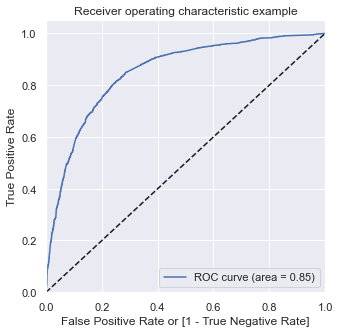

In [113]:
draw_roc(y_train_pred_final.Lead_converted, y_train_pred_final.Conversion_Prob)

## Step 12: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
#numbers = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_converted,Conversion_Prob,Index,predicted,0.0,0.01,0.02,0.03,0.04,0.05,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0,0.408893,641410,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.150106,597687,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.263256,626825,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.861331,587928,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.155668,622366,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

#num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
num = [float(x)/100 for x in range(100)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead_converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.381262  1.000000  0.000000
0.01  0.01  0.381416  1.000000  0.000250
0.02  0.02  0.382653  0.999594  0.002499
0.03  0.03  0.386054  0.998783  0.008496
0.04  0.04  0.396722  0.997567  0.026487
...    ...       ...       ...       ...
0.95  0.95  0.627860  0.027170  0.998001
0.96  0.96  0.625077  0.018248  0.999000
0.97  0.97  0.622449  0.010138  0.999750
0.98  0.98  0.620594  0.005272  0.999750
0.99  0.99  0.619357  0.001622  1.000000

[100 rows x 4 columns]


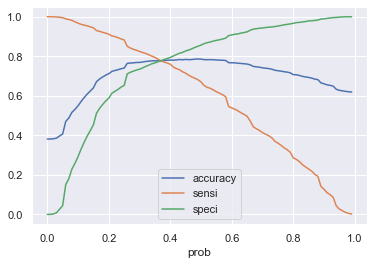

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [117]:
cutoff_df["FPR"] = 1-cutoff_df["speci"]
cutoff_df["dif"] = cutoff_df["sensi"] - cutoff_df["FPR"]
print(cutoff_df[(cutoff_df.index < 0.55) & (cutoff_df.index > 0.30)][["prob","accuracy","sensi","FPR","dif"]])

      prob  accuracy     sensi       FPR       dif
0.31  0.31  0.770872  0.819140  0.258871  0.560270
0.32  0.32  0.773655  0.814274  0.251374  0.562900
0.33  0.33  0.775201  0.807786  0.244878  0.562908
0.34  0.34  0.776747  0.800892  0.238131  0.562761
0.35  0.35  0.777056  0.794404  0.233633  0.560771
0.36  0.36  0.777211  0.785077  0.227636  0.557441
0.37  0.37  0.777211  0.776967  0.222639  0.554328
0.38  0.38  0.778757  0.770884  0.216392  0.554492
0.39  0.39  0.780303  0.766018  0.210895  0.555123
0.40  0.40  0.780767  0.759935  0.206397  0.553538
0.41  0.41  0.780303  0.745742  0.198401  0.547341
0.42  0.42  0.781540  0.737632  0.191404  0.546227
0.43  0.43  0.783704  0.731955  0.184408  0.547547
0.44  0.44  0.782313  0.721817  0.180410  0.541407
0.45  0.45  0.784168  0.714517  0.172914  0.541604
0.46  0.46  0.782931  0.703974  0.168416  0.535558
0.47  0.47  0.783550  0.695864  0.162419  0.533445
0.48  0.48  0.785560  0.688970  0.154923  0.534047
0.49  0.49  0.786178  0.681671 

#### From the curve and tabular analysis above, 0.49 is the optimum point to take it as a cutoff probability to maximize accuracy.
|  prob  |  accuracy  |  sensi  |  FPR  |  dif  |
| ------ | ---------- | ------- | ----  | ---- |
|  0.49  |   0.786178 | 0.681671 | 0.149425 | 0.532245 |


In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_train_pred_final.head()

,Lead_converted,Conversion_Prob,Index,predicted,0.0,0.01,0.02,0.03,0.04,0.05,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,0,0.408893,641410,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.150106,597687,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.263256,626825,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.861331,587928,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.155668,622366,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead_converted, y_train_pred_final.final_predicted)

0.786178107606679

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead_converted, y_train_pred_final.final_predicted )
confusion2

array([[3404,  598],
       [ 785, 1681]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
FN

785

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6816707218167072

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8505747126436781

In [125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14942528735632185


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7376042123738482


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8126044402005251


## Precision and Recall

In [128]:
#Looking at the confusion matrix again

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_converted, y_train_pred_final.predicted )
confusion

array([[3428,  574],
       [ 813, 1653]], dtype=int64)

##### Precision
TP / TP + FP

In [130]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7422541535698248

##### Recall
TP / TP + FN

In [131]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.670316301703163

Using sklearn utilities for the same

In [132]:
from sklearn.metrics import precision_score, recall_score

In [134]:
precision_score(y_train_pred_final.Lead_converted, y_train_pred_final.predicted)

0.7422541535698248

In [135]:
recall_score(y_train_pred_final.Lead_converted, y_train_pred_final.predicted)

0.670316301703163

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Lead_converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Lead_converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead_converted, y_train_pred_final.Conversion_Prob)

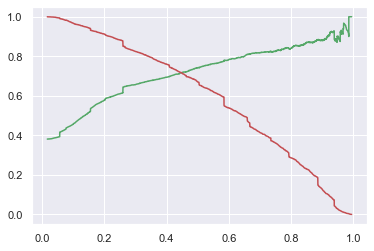

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 13: Making predictions on the test set

In [140]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

Dropping highly correlated columns

In [141]:
X_test = X_test.drop(correlated_drop_columns, 1)

In [142]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Specialization_Finance Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,
619003,0.857967,0.964504,2.613424,-1.057954,1.638100,-0.687272,-0.484585,-0.371121,-0.337384,1.055659,-0.663003,-0.762761,1.791909
636884,-0.656434,-0.885371,-1.085519,-1.057954,-0.610463,-0.687272,-0.484585,-0.371121,-0.337384,1.055659,-0.663003,-0.762761,1.791909
590281,0.290067,-0.777416,1.226321,-1.057954,-0.610463,1.455029,-0.484585,-0.371121,-0.337384,-0.947275,-0.663003,-0.762761,-0.558064
579892,-0.656434,-0.885371,-1.085519,-1.057954,-0.610463,-0.687272,2.063622,-0.371121,2.963979,1.055659,-0.663003,1.311026,-0.558064
617929,-0.656434,-0.885371,-1.085519,-1.057954,-0.610463,-0.687272,-0.484585,-0.371121,-0.337384,-0.947275,1.508289,-0.762761,-0.558064


In [143]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [144]:
y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

Lead Number
619003    0.645670
636884    0.885816
590281    0.178474
579892    0.056793
617929    0.792310
579992    0.632810
643289    0.340913
581637    0.243678
588474    0.082885
609001    0.488346
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
619003,0.645670
636884,0.885816
590281,0.178474
579892,0.056793
617929,0.792310


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting CustID to index
y_test_df['Index'] = y_test_df.index

In [150]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Index,0
0,1,619003,0.645670
1,1,636884,0.885816
2,1,590281,0.178474
3,0,579892,0.056793
4,1,617929,0.792310


In [153]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [154]:
# Rearranging the columns
desired_order = ['Index', 'Converted', 'Conversion_Prob']
y_pred_final = y_pred_final.reindex(columns=desired_order)

In [155]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Index,Converted,Conversion_Prob
0,619003,1,0.645670
1,636884,1,0.885816
2,590281,1,0.178474
3,579892,0,0.056793
4,617929,1,0.792310


In [156]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.49 else 0)

In [157]:
y_pred_final.head()

,Index,Converted,Conversion_Prob,final_predicted
0,619003,1,0.645670,1
1,636884,1,0.885816,1
2,590281,1,0.178474,0
3,579892,0,0.056793,0
4,617929,1,0.792310,1


In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7835497835497836

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1430,  247],
       [ 353,  742]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6776255707762557

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.8527131782945736

In [163]:
TP/float(len(X_test))

0.2676767676767677